In [19]:
from tensorflow import keras
from keras.preprocessing.image import load_img, ImageDataGenerator
import numpy as np

In [20]:
train_data_generator = ImageDataGenerator(rescale=1./255)
val_data_generator = ImageDataGenerator(rescale=1./255)

In [21]:
train_data = train_data_generator.flow_from_directory(
    '/content/drive/MyDrive/dino-dragon/train',
    class_mode = 'binary',
    batch_size=32,
    target_size=(150, 150),
    shuffle=False
)

val_data = val_data_generator.flow_from_directory(
    '/content/drive/MyDrive/dino-dragon/test',
    class_mode = 'binary',
    batch_size=32,
    target_size=(150, 150),
    shuffle=False
)

Found 1594 images belonging to 2 classes.
Found 394 images belonging to 2 classes.


In [22]:
model = keras.Sequential([
    keras.Input(shape=(150,150,3)),
    keras.layers.Conv2D(32, (3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
    ])

In [23]:
learning_rate = 0.002

In [24]:
optimizer = keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.8)

In [25]:
loss = keras.losses.BinaryCrossentropy()

In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 175232)            0         
                                                                 
 dense_2 (Dense)             (None, 64)                11214912  
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 11215873 (42.79 MB)
Trainable params: 11215873 (42.79 MB)
Non-trainable params: 0 (0.00 Byte)
____________

In [27]:
model.compile(optimizer=optimizer, loss=loss, metrics=[keras.metrics.BinaryAccuracy(threshold=0.5)])


In [28]:
history = model.fit(train_data, epochs=10, validation_data=val_data)

Epoch 1/10
50/50 [==============================] - 52s 979ms/step - loss: 0.7347 - binary_accuracy: 0.3833 - val_loss: 0.6928 - val_binary_accuracy: 0.5076
Epoch 2/10
50/50 [==============================] - 42s 839ms/step - loss: 0.6956 - binary_accuracy: 0.4580 - val_loss: 0.6926 - val_binary_accuracy: 0.5863
Epoch 3/10
50/50 [==============================] - 43s 857ms/step - loss: 0.6942 - binary_accuracy: 0.5069 - val_loss: 0.6926 - val_binary_accuracy: 0.5279
Epoch 4/10
50/50 [==============================] - 45s 890ms/step - loss: 0.7001 - binary_accuracy: 0.5383 - val_loss: 0.6854 - val_binary_accuracy: 0.6345
Epoch 5/10
50/50 [==============================] - 49s 909ms/step - loss: 0.6874 - binary_accuracy: 0.6010 - val_loss: 0.6698 - val_binary_accuracy: 0.8173
Epoch 6/10
50/50 [==============================] - 43s 865ms/step - loss: 0.6700 - binary_accuracy: 0.6813 - val_loss: 0.6678 - val_binary_accuracy: 0.7690
Epoch 7/10
50/50 [==============================] - 51s 1s

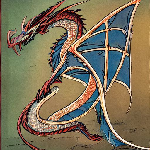

In [54]:
img_path = '/content/drive/MyDrive/dino-dragon/test/dragon/b58d5ee7-db27-48cf-9a24-036a7a92f0e3.jpg'
img = load_img(img_path, target_size=(150, 150))
img

In [44]:
def preprocess_input(x):
  x /= 255
  return x

In [55]:
x = np.array(img, dtype='float32')
x = np.array([x])
x = preprocess_input(x)

In [56]:
prediction = model.predict(x)
if prediction[0] < 0.5:
  print("0, DINO")
else:
  print("1, DRAGON")
print(prediction)

1/1 [==============================] - 0s 33ms/step
1, DRAGON
[[0.57351]]


In [63]:
np.median(history.history['binary_accuracy'])

0.6339397728443146

In [69]:
np.std(history.history['loss'])

0.04383834237417414

In [57]:
train_data_generator_2 = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
    )
val_data_generator_2 = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
    )

In [58]:
train_data_2 = train_data_generator_2.flow_from_directory(
    '/content/drive/MyDrive/dino-dragon/train',
    class_mode = 'binary',
    batch_size=32,
    target_size=(150, 150),
    shuffle=False
)

val_data_2 = val_data_generator_2.flow_from_directory(
    '/content/drive/MyDrive/dino-dragon/test',
    class_mode = 'binary',
    batch_size=32,
    target_size=(150, 150),
    shuffle=False
)

Found 1594 images belonging to 2 classes.
Found 394 images belonging to 2 classes.


In [62]:
history_2 = model.fit(train_data_2, epochs=20, validation_data=val_data_2, initial_epoch=10)

Epoch 11/20
50/50 [==============================] - 88s 2s/step - loss: 0.5645 - binary_accuracy: 0.7258 - val_loss: 0.7049 - val_binary_accuracy: 0.5685
Epoch 12/20
50/50 [==============================] - 60s 1s/step - loss: 0.6054 - binary_accuracy: 0.7020 - val_loss: 0.5502 - val_binary_accuracy: 0.7360
Epoch 13/20
50/50 [==============================] - 71s 1s/step - loss: 0.6068 - binary_accuracy: 0.6844 - val_loss: 0.5524 - val_binary_accuracy: 0.7157
Epoch 14/20
50/50 [==============================] - 56s 1s/step - loss: 0.5665 - binary_accuracy: 0.7215 - val_loss: 0.5365 - val_binary_accuracy: 0.7640
Epoch 15/20
50/50 [==============================] - 60s 1s/step - loss: 0.5322 - binary_accuracy: 0.7560 - val_loss: 0.5603 - val_binary_accuracy: 0.6929
Epoch 16/20
50/50 [==============================] - 56s 1s/step - loss: 0.5649 - binary_accuracy: 0.7196 - val_loss: 0.5095 - val_binary_accuracy: 0.7665
Epoch 17/20
50/50 [==============================] - 58s 1s/step - los

In [64]:
val_loss_mean = (np.mean(history.history['val_loss']) + np.mean(history_2.history['val_loss'])) / 2
val_loss_mean

0.6041648417711258

In [68]:
np.mean(history_2.history['val_binary_accuracy'][6:])

0.7201776653528214

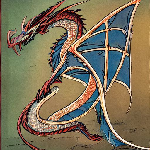

In [73]:
img

In [74]:
prediction = model.predict(x)
if prediction[0] < 0.5:
  print("0, DINO")
else:
  print("1, DRAGON")
print(prediction)

1/1 [==============================] - 0s 35ms/step
1, DRAGON
[[0.9724808]]
